#**Travel Insurance Claim Prediction Using Data Analytics and Machine Learning**
### Created By : Gabriella Davintia

## Business Problem Understanding

**Context**  

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan, baik di dalam negeri maupun luar negeri. Beberapa negara bahkan mewajibkan para turis untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi bergantung pada pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi. Data pemegang polis di perusahaan asuransi merupakan data historis yang terdiri dari destinasi, produk asuransi, dan sebagainya.

**Problem Statement**

Perusahaan belum memiliki pemahaman yang jelas tentang karakteristik dan perilaku pelanggan yang mengajukan klaim asuransi perjalanan. Hal ini menyebabkan kesulitan dalam:

- Mengidentifikasi faktor-faktor utama yang mempengaruhi kemungkinan klaim, sehingga penentuan premi dan mitigasi risiko belum optimal.
- Menentukan segmentasi pelanggan berdasarkan profil, perilaku, dan risiko klaim.
- Merancang strategi pemasaran dan produk yang tepat, karena tidak ada analisis mendalam terkait pola pembelian polis dan klaim.

Oleh karena itu, dibutuhkan analisis data yang dapat menjawab pertanyaan inti:

**Faktor apa saja yang paling memengaruhi kemungkinan seorang nasabah untuk mengajukan klaim asuransi perjalanan?**

**Goals**

Mengembangkan model analitik untuk memahami faktor-faktor yang mempengaruhi klaim asuransi perjalanan dan memprediksi kemungkinan pelanggan melakukan klaim, sehingga perusahaan dapat meningkatkan akurasi penetapan premi, mengelola risiko, dan menyusun strategi pemasaran yang lebih efektif.

**Analytic Approach**

Proses analisis dimulai dengan data preprocessing, seperti pembersihan data, penanganan missing values, dan encoding fitur kategorikal. Setelah itu dilakukan EDA untuk memahami pola pelanggan serta faktor yang berkaitan dengan klaim.

Selanjutnya diterapkan beberapa model machine learning—antara lain Logistic Regression, Random Forest, dan XGBoost—yang divalidasi menggunakan cross-validation. Kinerja model dievaluasi dengan Accuracy, Precision, Recall, dan AUC-ROC, lalu dipilih model terbaik untuk memprediksi klaim dan mendukung pengambilan keputusan terkait risiko dan premi.

**Stakeholder**

Investor & Manajemen Perusahaan Asuransi

**Metric Evaluation**

Type I Error (False Positive)

Prediksi: pelanggan akan membeli asuransi, kenyataan: tidak membeli.

Konsekuensi: biaya marketing terbuang (promo/email/sales efforts ke orang yang tidak tertarik).

Type II Error (False Negative)

Prediksi: pelanggan tidak akan membeli, kenyataan: sebenarnya tertarik membeli.

Konsekuensi: kehilangan pendapatan karena calon pembeli tidak pernah ditawarkan promo/penawaran.

Dalam evaluasi model, fokus utama adalah mengurangi Type 2 Error (False Negative), yaitu kondisi ketika model gagal mendeteksi klaim yang sebenarnya terjadi. Kesalahan ini berdampak besar pada kerugian finansial dan pengelolaan risiko perusahaan.

Oleh karena itu, metrik yang diprioritaskan adalah F2-Score, karena metrik ini lebih menekankan kemampuan model dalam mengenali kasus klaim (recall) dibandingkan precision. Selain itu, Accuracy, Precision, Recall, dan AUC-ROC tetap digunakan sebagai metrik pendukung untuk memastikan performa model tetap seimbang dan dapat diandalkan.

5-Point Business ML Goals
1. Problem

Perusahaan ingin memprediksi apakah seorang pelanggan akan melakukan insurance claim. Kesalahan dalam prediksi dapat menimbulkan kerugian finansial yang besar atau membuat penilaian risiko menjadi tidak akurat.

2. Data

Dataset berisi informasi pelanggan, detail perjalanan, nilai transaksi, hingga status klaim. Mayoritas fitur bersifat kategorikal dan data target sangat imbalanced (klaim sangat sedikit).

3. ML Objectives

- Membangun model klasifikasi yang mampu:

- Meningkatkan kemampuan mendeteksi pelanggan yang akan melakukan klaim.

- Meminimalkan False Negative karena FN paling merugikan perusahaan.

- Menghasilkan metrik utama: F2-Score, dengan pendukung Recall & AUC-ROC.

4. Action

- Melakukan EDA, feature engineering, resampling imbalanced class, dan tuning model.

- Menggunakan beberapa baseline model lalu memilih model dengan performa terbaik pada data test.

- Menggunakan teknik interpretasi (SHAP) untuk memahami faktor risiko klaim.

5. Value

Model membantu perusahaan:

- Mengurangi kerugian karena klaim yang tidak terdeteksi (False Negative).

- Mengoptimalkan strategi underwriting dan penetapan premi.

- Meningkatkan efisiensi operasional dan pengelolaan risiko.

- Mendukung keputusan bisnis berbasis data.

## Data Understanding

Note:

- Dataset bersifat tidak seimbang, karena jumlah pelanggan yang melakukan klaim jauh lebih sedikit dibanding yang tidak melakukan klaim.

- Sebagian besar fitur merupakan data kategorikal (Nominal, Ordinal, Binary), termasuk beberapa fitur dengan kardinalitas tinggi.

- Setiap baris data merepresentasikan informasi seorang pelanggan terkait penggunaan produk Travel Insurance dan apakah pelanggan tersebut mengajukan klaim selama periode perjalanan mereka.

### Data Dictionary

| **Attribute**         | **Data Type** | **Description**                                    |
| --------------------- | ------------- | -------------------------------------------------- |
| Agency                | Object        | Name of the travel insurance agency                |
| Agency Type           | Object        | Type/category of travel insurance agency           |
| Distribution Channel  | Object        | Channel through which the insurance is distributed |
| Product Name          | Object        | Name of the travel insurance product               |
| Gender                | Object        | Gender of the insured customer                     |
| Duration              | Integer       | Duration of the trip (in days)                     |
| Destination           | Object        | Travel destination                                 |
| Net Sales             | Float         | Total sales amount of the travel insurance policy  |
| Commission (in value) | Float         | Commission received by the insurance agency        |
| Age                   | Integer       | Age of the insured                                 |
| Claim                 | Integer       | Claim status (1 = claim submitted, 0 = no claim)   |

In [192]:
%pip install category_encoders

In [193]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

Load Dataset

In [194]:
df = pd.read_csv("/content/data_travel_insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


Dataset travel insurance ini memiliki 44.328 baris dan 11 kolom, yang masing-masing merepresentasikan data transaksi pelanggan terkait pembelian asuransi perjalanan dan status klaimnya.

In [195]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


##**Data Cleaning**

###Missing Value

Ada data yang hilang/kosong di kolom `gender` sebanyak 31,647 baris dari total 44,328 baris data di dataset.

In [196]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[TST, SSI]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]"
3,Product Name,object,0,0.00,26,"[Annual Travel Protect Gold, 2 way Comprehensi..."
4,Gender,object,31647,71.39,2,"[nan, M]"
5,Duration,int64,0,0.00,437,"[244, 21]"
6,Destination,object,0,0.00,138,"[MYANMAR, SWEDEN]"
7,Net Sales,float64,0,0.00,1006,"[185.0, 34.7]"
8,Commision (in value),float64,0,0.00,915,"[35.63, 54.0]"
9,Age,int64,0,0.00,89,"[38, 72]"


Pertama kita akan menghapus kolom `Gender`, karena tidak berguna untuk analisa yang akan kita lakukan dan juga tidak berguna dalam pembuatan model machine learning nantinya.

###Drop Column

In [197]:
df.drop(['Gender'],axis=1, inplace=True)

Mari kita check informasi dataframenya lagi

In [198]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,16,"[TST, JZI]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Offline, Online]"
3,Product Name,object,0,0.0,26,"[Individual Comprehensive Plan, Premier Plan]"
4,Duration,int64,0,0.0,437,"[300, 472]"
5,Destination,object,0,0.0,138,"[EGYPT, PAPUA NEW GUINEA]"
6,Net Sales,float64,0,0.0,1006,"[-12.0, 46.0]"
7,Commision (in value),float64,0,0.0,915,"[3.05, 142.56]"
8,Age,int64,0,0.0,89,"[74, 38]"
9,Claim,object,0,0.0,2,"[No, Yes]"


sekarang kolom `Gender` sudah tidak ada. Kolom gender dihapus supaya analisa yang kita lakukan dan juga model Machine Learning yang nanti kita akan buat, tidak melakukan diskriminasi terhadap gender. Dimana semestinya, gender tidak mempengaruhi/membedakan siapa yang klaim asuransi atau tidak.

###Duplicated Data

In [199]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [200]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(5004)

In [201]:
df_clean = df.copy()
duplicate = df_clean.duplicated()
df_clean[duplicate]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,No
360,EPX,Travel Agency,Online,Cancellation Plan,6,MALAYSIA,10.0,0.00,36,No
473,EPX,Travel Agency,Online,Cancellation Plan,11,MALAYSIA,10.0,0.00,36,No
488,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,No
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,3,MALAYSIA,20.0,0.00,36,No
...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,49,VIET NAM,20.0,0.00,36,No
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,5,THAILAND,29.7,17.82,38,No
44313,EPX,Travel Agency,Online,Cancellation Plan,5,CHINA,14.0,0.00,36,No
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,5,THAILAND,20.0,0.00,36,No


In [202]:
print("Jumlah duplikat sebelum dihapus:", df_model.duplicated().sum())

df_clean = df_clean.drop_duplicates(keep='first')

print("Jumlah duplikat sesudah dihapus:", df_clean.duplicated().sum())
print("Total baris setelah dihapus:", df_clean.shape[0])

Jumlah duplikat sebelum dihapus: 5004
Jumlah duplikat sesudah dihapus: 0
Total baris setelah dihapus: 39324


###Outlier

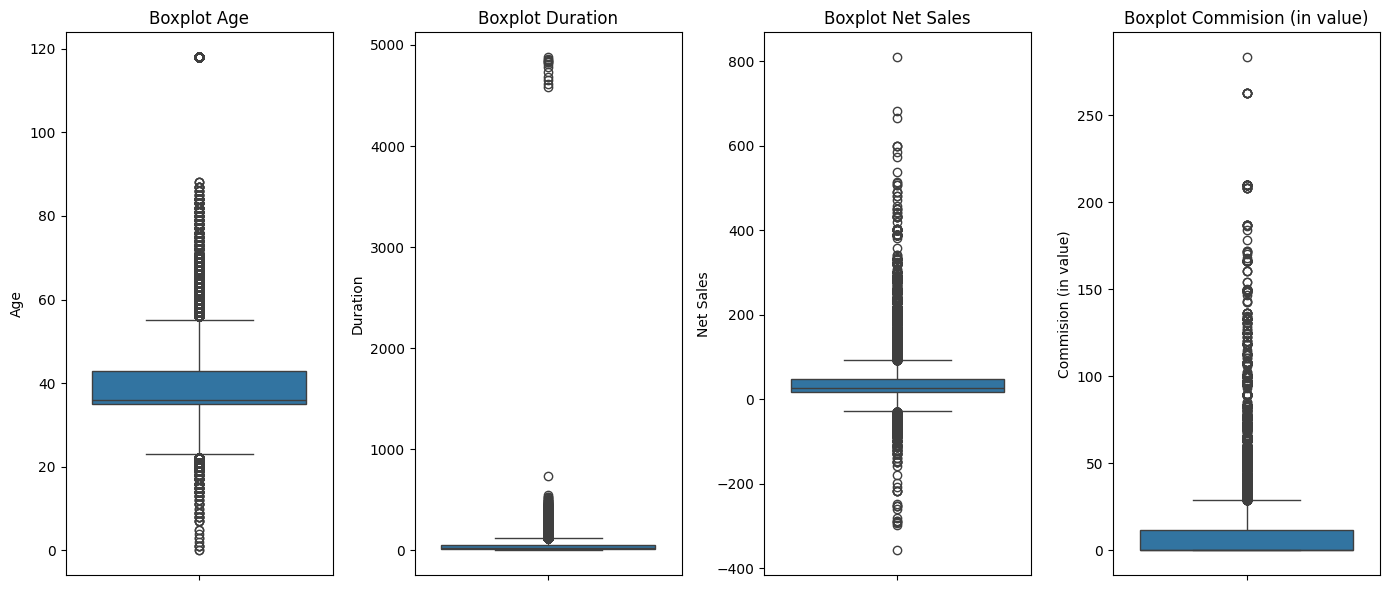

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Age', 'Duration', 'Net Sales', 'Commision (in value)']

plt.figure(figsize=(14,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

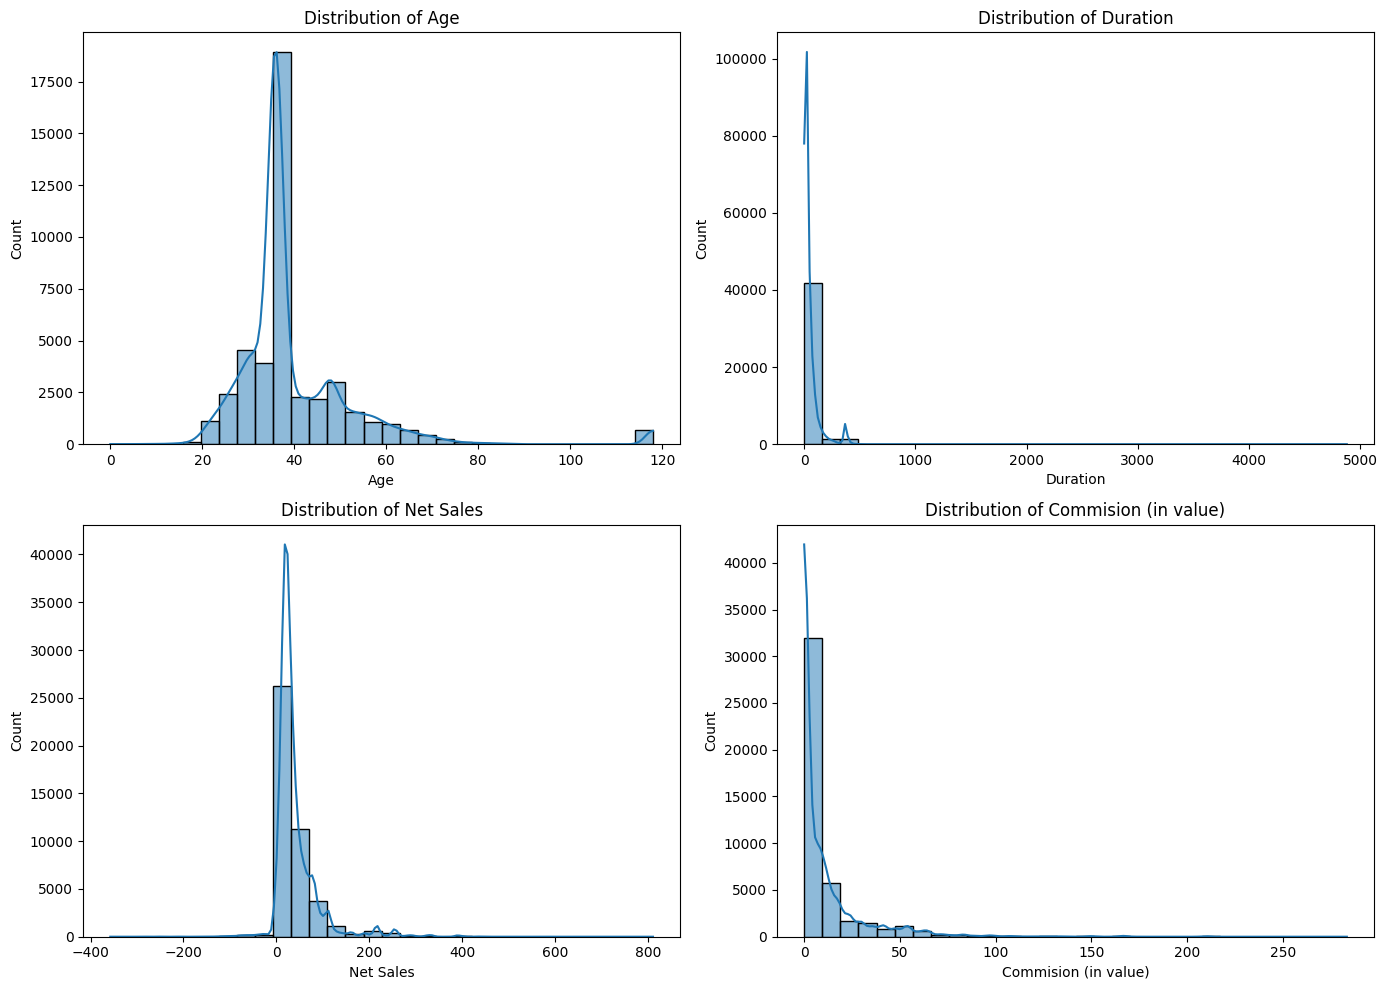

In [204]:
num_cols = ['Age', 'Duration', 'Net Sales', 'Commision (in value)']

plt.figure(figsize=(14,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- Age: Mayoritas berada di rentang usia produktif, tetapi terdapat beberapa nilai usia yang sangat tinggi/rendah → indikasi outlier ringan.

- Duration: Terlihat beberapa durasi perjalanan yang sangat panjang dibanding mayoritas data → outlier cukup jelas.

- Net Sales dan Commission (in value): Distribusi sangat right-skewed (ekor panjang ke kanan), dengan beberapa nilai penjualan/komisi yang jauh lebih besar dari kebanyakan → outlier finansial.

Outlier memang ada, namun untuk model berbasis tree (Decision Tree, Random Forest, XGBoost, LightGBM), outlier tidak terlalu bermasalah. Untuk model linear / berbasis jarak, efek outlier bisa dikurangi dengan scaling, log transform, atau robust scaler, bukan dengan langsung menghapus data.

Outlier ini masih masuk akal secara domain (misalnya perjalanan sangat lama atau polis bernilai tinggi), sehingga lebih baik dipertahankan daripada dihapus.

### Data Balance/Imbalance

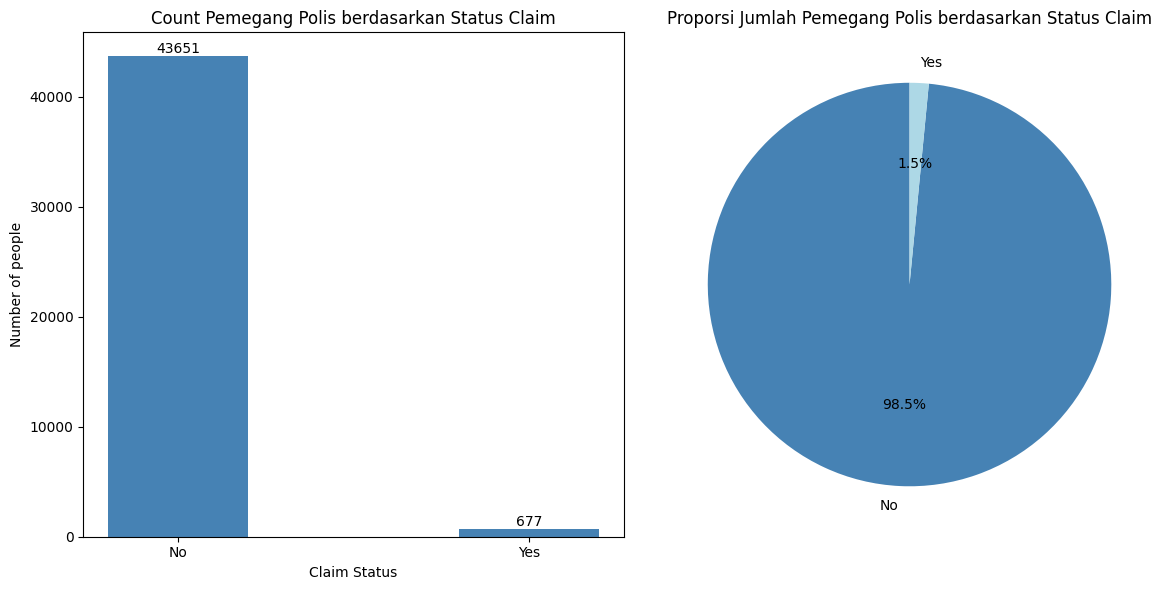

In [205]:
claim = df.groupby(by=['Claim']).size().reset_index(name='counts')

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# bar chart
ax[0].bar(claim['Claim'], claim['counts'], color='steelblue', width=0.4)
ax[0].set_xlabel('Claim Status')
ax[0].set_ylabel('Number of people')
ax[0].set_title('Count Pemegang Polis berdasarkan Status Claim')

for i, count in enumerate(claim['counts']):
    ax[0].text(claim['Claim'][i], count + 0.1, str(count), ha='center', va='bottom')

# pie chart
wedges, texts, autotexts = ax[1].pie(
    claim['counts'],
    labels=claim['Claim'],
    autopct='%1.1f%%',
    colors=['steelblue', 'lightblue', 'skyblue', 'deepskyblue'],
    startangle=90,
    textprops={'color': 'black', 'fontsize': 10}
)
ax[1].set_title('Proporsi Jumlah Pemegang Polis berdasarkan Status Claim')

plt.tight_layout()
plt.show()

- Mayoritas pemegang polis tidak melakukan klaim, terlihat jelas dari jumlah dan proporsi yang jauh lebih besar dibandingkan yang melakukan klaim.

- Pemegang polis dengan status claim merupakan kelas minoritas, sehingga data bersifat imbalanced.

- Kondisi ini menjelaskan mengapa metrik seperti recall, precision, dan ROC AUC lebih relevan dibandingkan accuracy saja dalam evaluasi model.

- Ketidakseimbangan kelas ini juga menjadi dasar penggunaan teknik seperti oversampling agar model lebih mampu mengenali kasus klaim.

### Statistical Testing

In [206]:
# Relationship significance for numeric variables
import scipy.stats as stats

# age
age_claim_yes = df[df['Claim']==1]['Age']
age_claim_no  = df[df['Claim']==0]['Age']

t_age = stats.ttest_ind(age_claim_yes, age_claim_no)
print("T-test Age vs Claim:", t_age)

# duration
dur_claim_yes = df[df['Claim']==1]['Duration']
dur_claim_no  = df[df['Claim']==0]['Duration']

t_duration = stats.ttest_ind(dur_claim_yes, dur_claim_no)
print("T-test Duration vs Claim:", t_duration)

# net sales
sales_yes = df[df['Claim']==1]['Net Sales']
sales_no  = df[df['Claim']==0]['Net Sales']

t_sales = stats.ttest_ind(sales_yes, sales_no)
print("T-test Net Sales vs Claim:", t_sales)

T-test Age vs Claim: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))
T-test Duration vs Claim: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))
T-test Net Sales vs Claim: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


- Ukuran sampel pada salah satu kelompok terlalu kecil atau tidak valid
Kelas Claim = 1 sangat minoritas dibanding Claim = 0, sehingga asumsi minimum jumlah sampel untuk t-test tidak terpenuhi.

- Kemungkinan terdapat nilai kosong (NaN) atau distribusi ekstrem
Adanya missing value atau distribusi yang sangat skewed (terutama pada Net Sales) menyebabkan perhitungan t-test tidak stabil.

- Asumsi t-test tidak cocok untuk data ini. Distribusi variabel numerik tidak normal, data sangat tidak seimbang (imbalanced), dan variabel finansial memiliki outlier ekstrem

##Cleaned Data

In [207]:
listItem = []

for col in df.columns:
    unique_vals = df[col].dropna().drop_duplicates()

    # Ambil sample aman (1 atau 2)
    if len(unique_vals) >= 2:
        sample_vals = list(unique_vals.sample(2).values)
    elif len(unique_vals) == 1:
        sample_vals = [unique_vals.iloc[0]]
    else:
        sample_vals = ["No Data"]

    listItem.append([
        col,
        df[col].dtype,
        df[col].isna().sum(),
        df[col].nunique(),
        sample_vals
    ])

dfDesc = pd.DataFrame(
    listItem,
    columns=['dataFeatures','dataType','null','unique','uniqueSample']
)

print(df.shape)
dfDesc

(44328, 10)


,dataFeatures,dataType,null,unique,uniqueSample
0,Agency,object,0,16,"[C2B, TST]"
1,Agency Type,object,0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,2,"[Offline, Online]"
3,Product Name,object,0,26,"[2 way Comprehensive Plan, Value Plan]"
4,Duration,int64,0,437,"[265, 58]"
5,Destination,object,0,138,"[TAIWAN, PROVINCE OF CHINA, GEORGIA]"
6,Net Sales,float64,0,1006,"[15.95, -39.6]"
7,Commision (in value),float64,0,915,"[0.66, 0.45]"
8,Age,int64,0,89,"[85, 50]"
9,Claim,object,0,2,"[Yes, No]"


In [208]:
df.to_excel('Data_Travel_Insurance_Cleaned.xlsx')

##Data Correlation

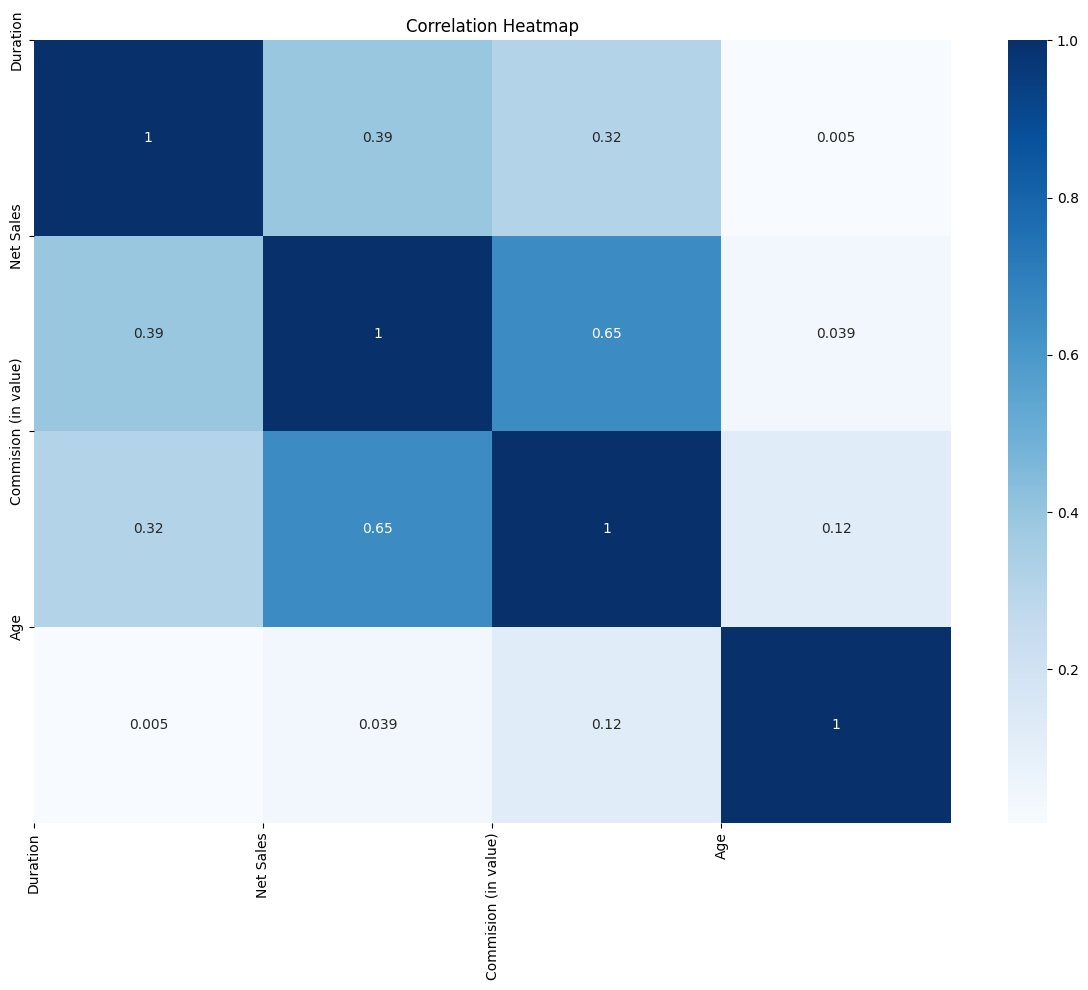

In [209]:
# Ambil kolom numerik saja
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr_matrix = numeric_df.corr()

# Plot heatmap menggunakan matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")

# Label sumbu
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.tight_layout()
plt.show()

## Data Analysis

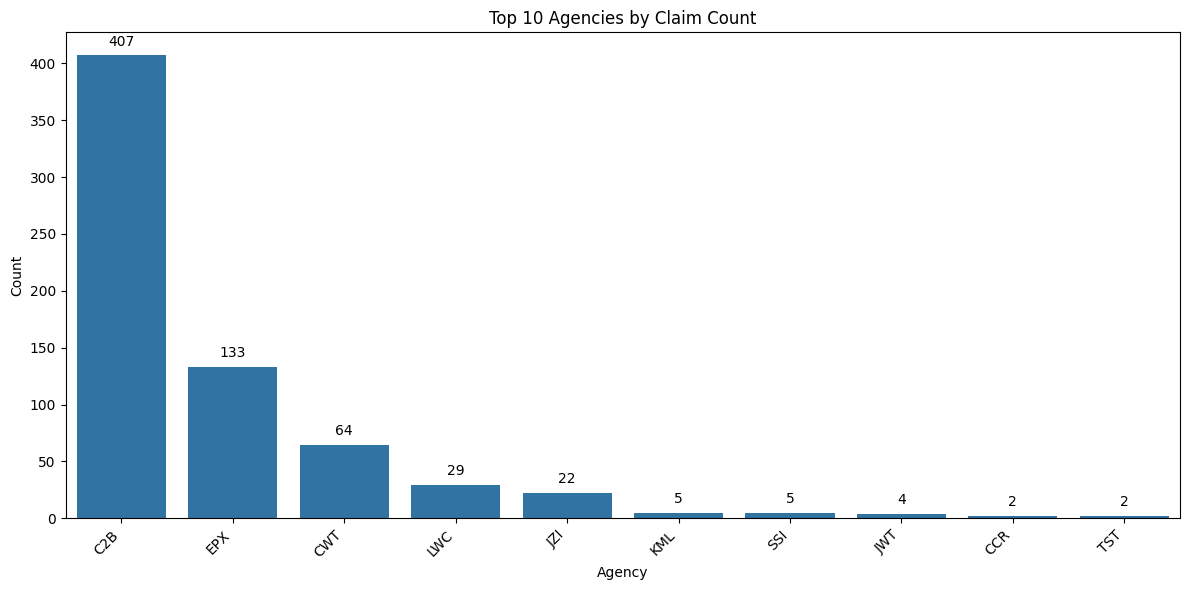

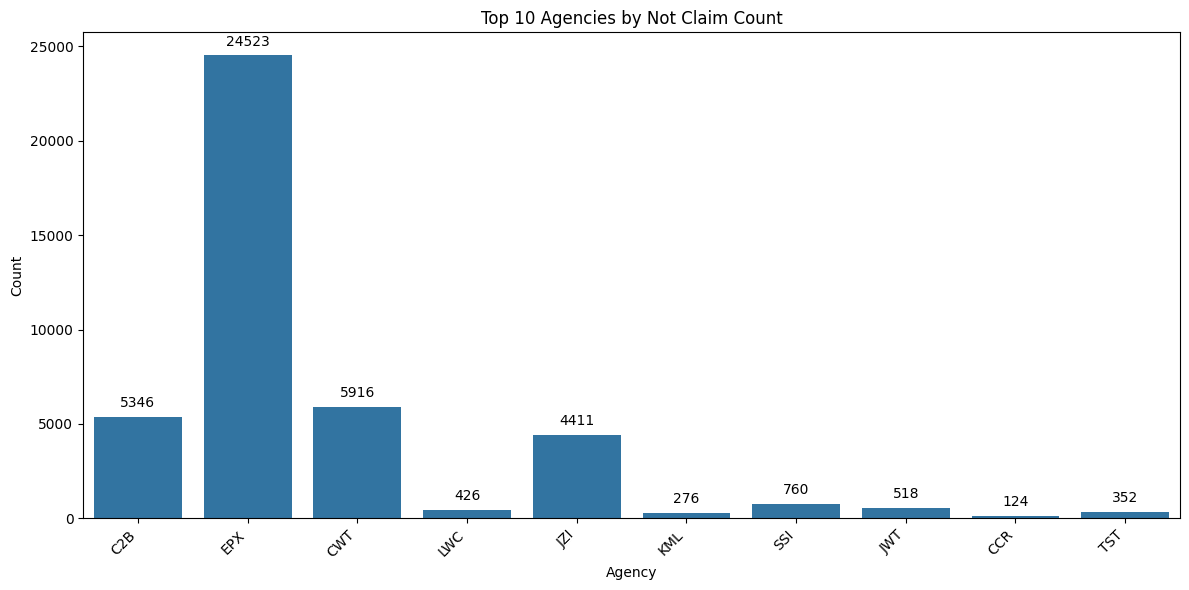

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah Claim per Agency
agency_claims = (
    df.groupby(['Agency', 'Claim'])
      .size()
      .unstack(fill_value=0)
      .sort_values(by='Yes', ascending=False)
      .head(10)
      .reset_index()
)

def plot_agency_claim(data, claim_type, title):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=data,
        x='Agency',
        y=claim_type
    )

    plt.title(title)
    plt.xlabel('Agency')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Tambahkan anotasi
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10,
            xytext=(0, 5),
            textcoords='offset points'
        )

    plt.tight_layout()
    plt.show()

# Claim = Yes
plot_agency_claim(
    data=agency_claims,
    claim_type='Yes',
    title='Top 10 Agencies by Claim Count'
)

# Claim = No
plot_agency_claim(
    data=agency_claims,
    claim_type='No',
    title='Top 10 Agencies by Not Claim Count'
)

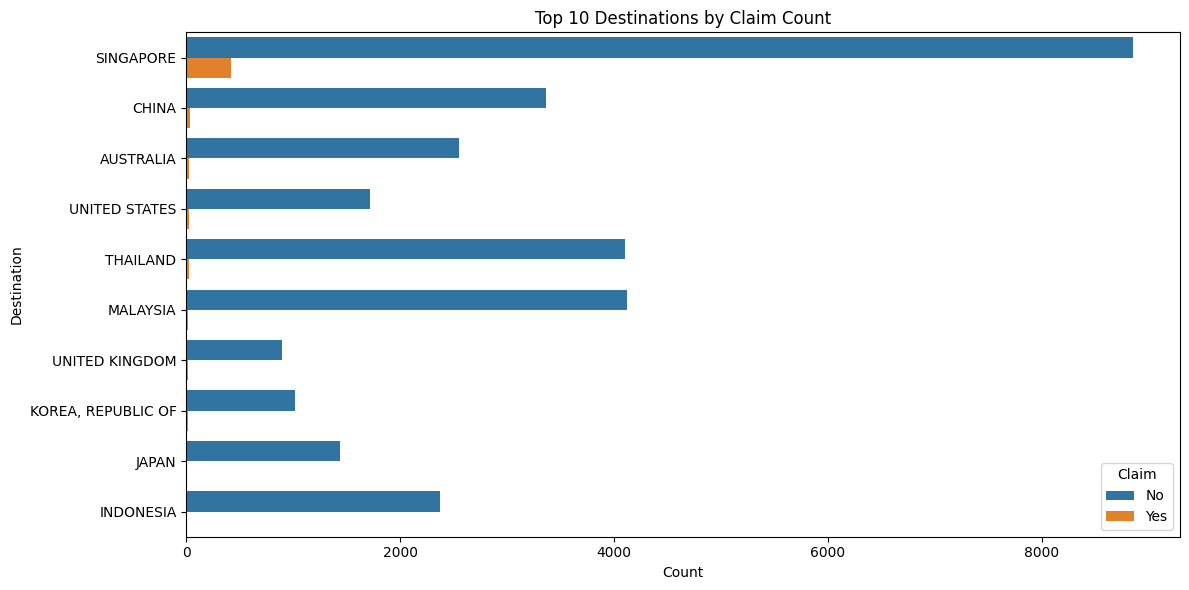

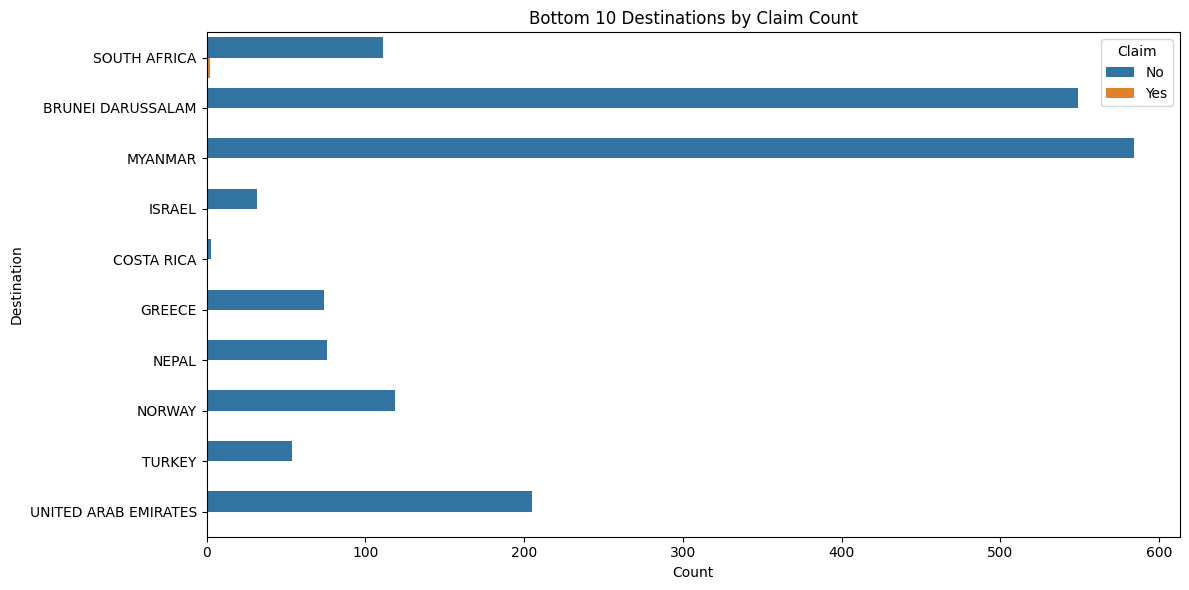

Claim,No,Yes,claim_rate
Destination,,,
COSTA RICA,3,1,0.250000
CZECH REPUBLIC,41,2,0.046512
SINGAPORE,8850,417,0.044998
ICELAND,76,3,0.037975
ISRAEL,32,1,0.030303
ITALY,310,6,0.018987
TURKEY,54,1,0.018182
SOUTH AFRICA,111,2,0.017699
FRANCE,335,6,0.017595


In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah Claim = Yes per Destination
destination_claims = (
    df[df['Claim'] == 'Yes']
    .groupby('Destination')
    .size()
    .sort_values(ascending=False)
)

top_10_destinations = destination_claims.head(10).index
bottom_10_destinations = destination_claims.tail(10).index

def plot_destination_claim(data, destinations, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=data[data['Destination'].isin(destinations)],
        y='Destination',
        hue='Claim',
        order=destinations
    )

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Destination')
    plt.legend(title='Claim')
    plt.tight_layout()
    plt.show()

# Top 10 Destination dengan klaim terbanyak
plot_destination_claim(
    data=df,
    destinations=top_10_destinations,
    title='Top 10 Destinations by Claim Count'
)

# Bottom 10 Destination dengan klaim tersedikit
plot_destination_claim(
    data=df,
    destinations=bottom_10_destinations,
    title='Bottom 10 Destinations by Claim Count'
)

destination_summary = (
    df.groupby(['Destination', 'Claim'])
      .size()
      .unstack(fill_value=0)
      .assign(
          claim_rate=lambda x: x['Yes'] / (x['Yes'] + x['No'])
      )
      .sort_values(by='claim_rate', ascending=False)
)

destination_summary.head(10)

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Duration grouping
duration_bins = [0, 7, 14, 21, 30, 60, 90, 1000]
duration_labels = [
    '< 1 week',
    '1–2 weeks',
    '2–3 weeks',
    '3–4 weeks',
    '1–2 months',
    '2–3 months',
    '> 3 months'
]

df['DurationGroup'] = pd.cut(
    df['Duration'],
    bins=duration_bins,
    labels=duration_labels,
    right=False
)

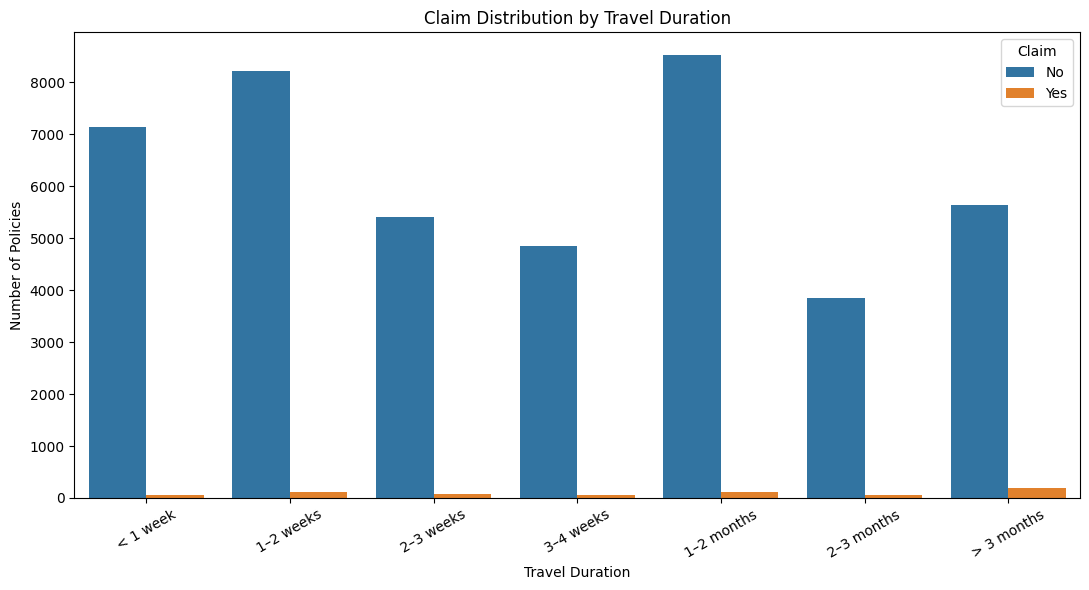

In [213]:
plt.figure(figsize=(11, 6))

sns.countplot(
    data=df,
    x='DurationGroup',
    hue='Claim'
)

plt.title('Claim Distribution by Travel Duration')
plt.xlabel('Travel Duration')
plt.ylabel('Number of Policies')
plt.xticks(rotation=30)
plt.legend(title='Claim')
plt.tight_layout()
plt.show()

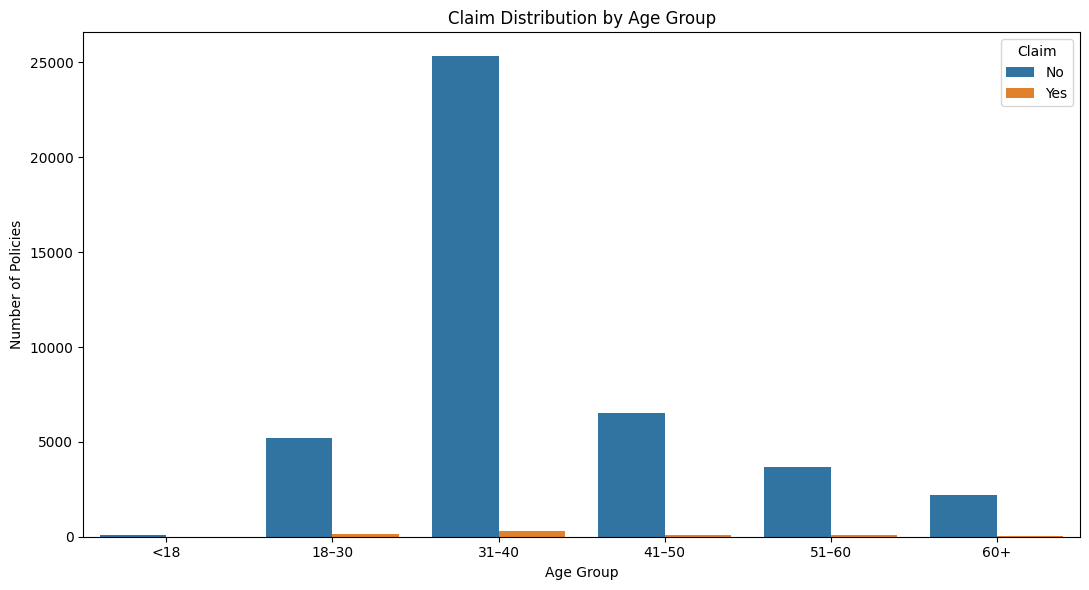

,count
AgeGroup,
<18,93
18–30,5364
31–40,25630
41–50,6596
51–60,3723
60+,2246


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Age grouping
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['<18', '18–30', '31–40', '41–50', '51–60', '60+']

df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=age_bins,
    labels=age_labels,
    right=False
)

plt.figure(figsize=(11, 6))

sns.countplot(
    data=df,
    x='AgeGroup',
    hue='Claim'
)

plt.title('Claim Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Policies')
plt.xticks(rotation=0)
plt.legend(title='Claim')
plt.tight_layout()
plt.show()

age_summary = (
    df['AgeGroup']
    .value_counts()
    .sort_index()
)

age_summary

## Data Preparation

### Encoding

In [215]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,DurationGroup,AgeGroup
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No,> 3 months,51–60
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No,< 1 week,31–40
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No,2–3 weeks,18–30
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No,2–3 weeks,51–60
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No,1–2 weeks,18–30


Yang akan kita lakukan adalah :

1. Fitur `Agency`
Diubah menggunakan Binary Encoding, karena memiliki jumlah unique value yang cukup banyak dan tidak memiliki urutan (non-ordinal). Penggunaan One Hot Encoding berpotensi menghasilkan terlalu banyak fitur baru.

2. Fitur `Product Name`
Diubah menggunakan Binary Encoding, karena jumlah produknya relatif banyak dan tidak memiliki hubungan ordinal antar kategori.

3. Fitur `Destination`
Diubah menggunakan Binary Encoding, karena memiliki kardinalitas tinggi dan tidak memiliki urutan. Pendekatan ini lebih efisien dibanding One Hot Encoding.

4. Fitur `Agency Type`
Diubah menggunakan One Hot Encoding, karena jumlah kategorinya sedikit dan tidak bersifat ordinal.

5. Fitur `Distribution Channel`
Diubah menggunakan One Hot Encoding, karena tidak memiliki urutan dan jumlah unique value relatif kecil.

6. Fitur `Gender`
Tidak digunakan dalam proses modeling karena memiliki jumlah missing value yang sangat besar, sehingga berpotensi menurunkan kualitas model.

7. Fitur numerik (`Age`, `Duration`, `Net Sales`, `Commision (in value)`)
Dipertahankan dalam bentuk numerik.
- dilakukan binning untuk fitur `Duration`
- Untuk model berbasis jarak atau linear (Logistic Regression, KNN), fitur ini akan dilakukan scaling.
- Untuk model berbasis tree (Decision Tree, Random Forest, Boosting), scaling tidak diwajibkan.

8. Target `Claim`
Dikodekan menjadi nilai biner (0 = No, 1 = Yes) sebagai variabel target untuk klasifikasi.

Binning `Duration`

In [216]:
df['Duration_bin'] = pd.cut(
    df['Duration'],
    bins=[-1, 7, 30, 90, 365, df['Duration'].max()],
    labels=[0, 1, 2, 3, 4]
)

In [217]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import category_encoders as ce

`Claim` No = 0, Yes = 1

In [218]:
df_model['Claim'] = df_model['Claim'].map({'No': 0, 'Yes': 1})

In [219]:
X = df_model.drop(columns='Claim')
y = df_model['Claim']

Tree-based model (Transformer tanpa scaling)

In [220]:
transformer_no_scaling = ColumnTransformer(
    transformers=[
        # Binary Encoding (High cardinality)
        ('binary', ce.BinaryEncoder(),
         ['Agency', 'Product Name', 'Destination']),

        # One Hot Encoding (Low cardinality)
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'),
         ['Agency Type', 'Distribution Channel']),

        # Numerik → passthrough
        ('num', 'passthrough',
         ['Age', 'Duration', 'Net Sales', 'Commision (in value)'])
    ]
)

 LogReg & KNN (Transformer dengan scaling)

In [221]:
transformer_with_scaling = ColumnTransformer(
    transformers=[
        ('binary', ce.BinaryEncoder(),
         ['Agency', 'Product Name', 'Destination']),

        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'),
         ['Agency Type', 'Distribution Channel']),

        ('num', StandardScaler(),
         ['Age', 'Duration', 'Net Sales', 'Commision (in value)'])
    ]
)

### Data Splitting

In [222]:
# Memisahkan fitur (X) dan target (y)
X = df_model.drop('Claim', axis=1)   # Independent variables
y = df_model['Claim']                # Target variable

In [223]:
# Pisahkan fitur dan target
X = df.drop('Claim', axis=1)
y = df['Claim']

Train-Test Split

In [224]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Cek bentuk data
X_train.shape, X_test.shape

((35462, 12), (8866, 12))

## Modeling & Evaluation

In [225]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Model Benchmarking : K-Fold

In [226]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,FunctionTransformer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve,precision_recall_curve, classification_report, confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay, fbeta_score, make_scorer, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif, SelectFromModel, RFE
from sklearn.metrics import RocCurveDisplay
from sklearn.impute import SimpleImputer
import time

In [227]:
X = df_model.drop(columns='Claim')
y = df_model['Claim']

In [228]:
transformer = ColumnTransformer(
    transformers=[
        # Binary Encoding (high cardinality)
        ('binary', ce.BinaryEncoder(), [
            'Agency',
            'Product Name',
            'Destination'
        ]),

        # One Hot Encoding (low cardinality)
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), [
            'Agency Type',
            'Distribution Channel'
        ])
    ],
    remainder='passthrough'
)

In [229]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [230]:
models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = [
    'Logistic Regression',
    'KNN',
    'Decision Tree',
    'Random Forest',
    'XGBoost',
    'LightGBM'
]

In [231]:
benchmark_df = pd.DataFrame({
    'model': model_names,
    'mean_roc_auc': rata,
    'std': std
})

benchmark_df.set_index('model').sort_values(
    by='mean_roc_auc',
    ascending=False
)

,mean_roc_auc,std
model,,
LightGBM,0.810717,0.015823
Logistic Regression,0.803261,0.011938
XGBoost,0.782092,0.015123
Random Forest,0.701583,0.013823
KNN,0.605010,0.031426
Decision Tree,0.539002,0.019062


### Model Benchmarking : Test Data

In [232]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test

    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Logistic Regression 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8731
           1       0.00      0.00      0.00       135

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866

KNN 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8731
           1       0.00      0.00      0.00       135

    accuracy                           0.98      8866
   macro avg       0.49      0.50      0.50      8866
weighted avg       0.97      0.98      0.98      8866

Decision Tree 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      8731
           1       0.06      0.07      0.06       135

    accuracy                           0.97      8866
   macro avg       0.52      0.52      0.52      8866
weighted avg       0.97      0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,roc_auc score
model,
LightGBM,0.812543
Logistic Regression,0.786113
XGBoost,0.774712
Random Forest,0.692510
KNN,0.592728
Decision Tree,0.527421


### Test Oversampling with K-Fold Cross Validation

In [233]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [234]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [235]:
data = x_train
target = y_train

In [236]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

[LightGBM] [Info] Number of positive: 487, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 31915, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015259 -> initscore=-4.167190
[LightGBM] [Info] Start training from score -4.167190


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 487, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 31915, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015259 -> initscore=-4.167190
[LightGBM] [Info] Start training from score -4.167190


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 488, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 31916, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015290 -> initscore=-4.165139
[LightGBM] [Info] Start training from score -4.165139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 488, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 31916, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015290 -> initscore=-4.165139
[LightGBM] [Info] Start training from score -4.165139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 488, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 31916, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015290 -> initscore=-4.165139
[LightGBM] [Info] Start training from score -4.165139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 488, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 31916, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015290 -> initscore=-4.165139
[LightGBM] [Info] Start training from score -4.165139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 488, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 31916, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015290 -> initscore=-4.165139
[LightGBM] [Info] Start training from score -4.165139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 488, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 31916, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015290 -> initscore=-4.165139
[LightGBM] [Info] Start training from score -4.165139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 488, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 31916, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015290 -> initscore=-4.165139
[LightGBM] [Info] Start training from score -4.165139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 488, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 31916, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015290 -> initscore=-4.165139
[LightGBM] [Info] Start training from score -4.165139


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 31428, number of negative: 31428
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 62856, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


#### Evaluation Metrics Without Oversampling

In [237]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.985837,0.983930,0.979834,0.810986,0.563480,0.495950,0.071869,0.000000,1.000000,0.000000
1,0.986088,0.984494,0.979675,0.775958,0.577625,0.496093,0.088296,0.000000,1.000000,0.000000
2,0.985932,0.984772,0.982996,0.805105,0.570457,0.496164,0.079918,0.000000,1.000000,0.000000
3,0.986057,0.984490,0.981285,0.842937,0.577464,0.496092,0.088115,0.000000,1.000000,0.000000
4,0.985994,0.984490,0.984962,0.827097,0.575565,0.513635,0.086066,0.018519,0.976744,0.333333
5,0.985994,0.983644,0.979164,0.842036,0.578712,0.495877,0.090164,0.000000,0.936170,0.000000
6,0.985932,0.984490,0.982894,0.790288,0.570457,0.496092,0.079918,0.000000,1.000000,0.000000
7,0.985994,0.984772,0.981818,0.812458,0.575565,0.496164,0.086066,0.000000,0.976744,0.000000
8,0.986026,0.984772,0.979678,0.765130,0.575722,0.496164,0.086066,0.000000,1.000000,0.000000
9,0.986026,0.984490,0.980620,0.820431,0.575722,0.496092,0.086066,0.000000,1.000000,0.000000


#### Evaluation Metrics With Oversampling

In [238]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.931494,0.882718,0.974081,0.799055,0.931357,0.527912,0.976136,0.509091,0.896127,0.067146
1,0.927899,0.881872,0.972938,0.743424,0.927772,0.525441,0.969772,0.490909,0.894833,0.064593
2,0.931335,0.873660,0.971837,0.795689,0.931231,0.521554,0.970186,0.518519,0.900236,0.062222
3,0.924828,0.864354,0.972445,0.826967,0.924679,0.520367,0.969390,0.574074,0.890064,0.063395
4,0.935058,0.876481,0.974806,0.816003,0.934955,0.525266,0.974927,0.537037,0.902929,0.065611
5,0.928599,0.882403,0.972513,0.815560,0.928480,0.536775,0.969327,0.611111,0.896316,0.076923
6,0.938669,0.873096,0.976262,0.780398,0.938509,0.519418,0.989723,0.500000,0.898028,0.060000
7,0.937094,0.862380,0.974544,0.777019,0.936924,0.515839,0.988991,0.537037,0.895993,0.058943
8,0.928949,0.869994,0.972553,0.747590,0.928819,0.510361,0.971586,0.425926,0.895245,0.050773
9,0.925194,0.877609,0.971647,0.798256,0.925073,0.529601,0.965477,0.574074,0.893492,0.070136


Terlihat bahwa setelah dilakukan oversampling, nilai recall untuk kelas positif (Claim = 1) mengalami peningkatan dibandingkan model tanpa oversampling. Hal ini menunjukkan bahwa model menjadi lebih baik dalam mendeteksi klaim yang benar-benar terjadi.

Namun, peningkatan recall tersebut diikuti dengan penurunan precision, yang berarti terdapat lebih banyak prediksi klaim yang ternyata tidak benar (false positive).

Kondisi ini sesuai dengan karakteristik oversampling, di mana jumlah data kelas minoritas (klaim) diperbanyak hingga seimbang dengan kelas mayoritas (tidak klaim). Dampaknya, model menjadi lebih sensitif terhadap klaim (recall naik), tetapi ketepatan prediksi klaim menurun (precision turun).

Dalam konteks travel insurance, dampak bisnisnya adalah:
- Model dengan oversampling mampu mengidentifikasi lebih banyak polis yang berpotensi mengajukan klaim, sehingga mengurangi risiko klaim yang tidak terdeteksi.
- Namun, peningkatan false positive dapat menyebabkan alokasi sumber daya yang kurang efisien, karena perusahaan mempersiapkan penanganan klaim yang sebenarnya tidak terjadi.

Pemilihan model sangat bergantung pada kondisi bisnis dan tujuan perusahaan:
- Jika selama ini klaim yang tidak terdeteksi masih menjadi masalah utama, maka model dengan oversampling lebih tepat, karena recall lebih penting.
- Jika perusahaan ingin menekan biaya operasional akibat prediksi klaim yang berlebihan, maka model tanpa oversampling dapat dipertimbangkan karena memiliki precision yang lebih baik.

Secara rata-rata, model menunjukkan performa sangat baik pada data training (Accuracy 93.38% dan ROC AUC 0.97), namun terjadi penurunan performa pada data testing (Accuracy 87.72% dan ROC AUC 0.80), yang mengindikasikan generalization gap ringan namun masih wajar.

Fokus utama pada kelas positif (klaim):
- Test Recall rata-rata = 0.54, artinya model mampu mendeteksi sekitar 54% klaim yang benar-benar terjadi.
- Test Precision rata-rata = 0.067, menunjukkan masih banyak false positive, yang berdampak pada efisiensi operasional.
- Test F1 Score = 0.53, mencerminkan trade-off antara recall dan precision.

Secara keseluruhan, model cukup efektif dalam mendeteksi klaim (recall) sesuai tujuan bisnis travel insurance untuk meminimalkan risiko klaim tidak terdeteksi, meskipun masih perlu perbaikan untuk meningkatkan precision agar biaya operasional lebih terkendali.

#### Classification Reports Without Oversampling

In [239]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3492
           1       0.00      0.00      0.00        55

    accuracy                           0.98      3547
   macro avg       0.49      0.50      0.50      3547
weighted avg       0.97      0.98      0.98      3547

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3492
           1       0.00      0.00      0.00        55

    accuracy                           0.98      3547
   macro avg       0.49      0.50      0.50      3547
weighted avg       0.97      0.98      0.98      3547

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3492
           1       0.00      0.00      0.00        54

    accuracy                           0.98      3546
   macro avg       0.49      0.50      0.50      3546
weighted avg       0.97      0.98      0.98      3546

              preci

#### Classification Reports With Oversampling

In [240]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3492
           1       0.07      0.51      0.12        55

    accuracy                           0.88      3547
   macro avg       0.53      0.70      0.53      3547
weighted avg       0.98      0.88      0.92      3547

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      3492
           1       0.06      0.49      0.11        55

    accuracy                           0.88      3547
   macro avg       0.53      0.69      0.53      3547
weighted avg       0.98      0.88      0.92      3547

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      3492
           1       0.06      0.52      0.11        54

    accuracy                           0.87      3546
   macro avg       0.53      0.70      0.52      3546
weighted avg       0.98      0.87      0.92      3546

              preci

Berdasarkan classification report, terlihat bahwa model tanpa oversampling gagal mengenali kelas positif (Claim = 1). Hampir seluruh prediksi difokuskan pada kelas negatif, yang tercermin dari recall kelas positif mendekati 0, meskipun nilai accuracy terlihat sangat tinggi. Hal ini menunjukkan bahwa accuracy tidak merepresentasikan performa model secara utuh pada data yang sangat tidak seimbang.

Sebaliknya, model dengan oversampling menunjukkan peningkatan signifikan pada recall kelas positif, dengan nilai recall berkisar di 40%–60%, sementara recall kelas negatif tetap berada pada level yang baik. Artinya, model menjadi lebih seimbang dalam mendeteksi kedua kelas, khususnya klaim yang benar-benar terjadi.

Meskipun precision kelas positif menurun, kondisi ini dapat diterima karena tujuan utama bisnis adalah meminimalkan klaim yang tidak terdeteksi (False Negative). Dengan oversampling, model mampu mengidentifikasi lebih banyak klaim potensial, sehingga risiko finansial perusahaan dapat ditekan lebih baik.

Oleh karena itu, untuk kasus ini digunakan model dengan oversampling, dengan asumsi bahwa perusahaan lebih membutuhkan deteksi klaim yang lebih banyak dibandingkan ketepatan prediksi yang sangat ketat.

Selanjutnya, hyperparameter tuning akan dilakukan pada model LightGBM untuk meningkatkan performa model secara keseluruhan dan memperoleh hasil yang lebih optimal.

### Hyperparameter Tuning

In [241]:
lgbm = lgb.LGBMClassifier()
ros = RandomOverSampler(random_state=42)

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])

In [242]:
hyperparam_space=[{
    'model__max_bin': [255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15, 30, 40],
    'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [42]
}]

default hyperparameter LGBM => `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

In [243]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [244]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('oversample', RandomOverSampler(random_state=42)),
    ('model', lgb.LGBMClassifier())
])

In [245]:
print("Best ROC AUC:", random_search.best_score_)
print("Best Parameters:")
for k, v in random_search.best_params_.items():
    print(f"{k}: {v}")

Best ROC AUC: 0.8162229203065399
Best Parameters:
model__random_state: 42
model__num_leaves: 31
model__num_iterations: 75
model__min_data_in_leaf: 20
model__max_bin: 230
model__learning_rate: 0.05


Hyperparameter terbaik LightGBM dari hasil tuning diperoleh sebagai
- max_bin = 230
- num_leaves = 31
- min_data_in_leaf = 20
- num_iterations = 75
- learning_rate = 0.05

Untuk max_bin dan learning_rate, nilai default sudah memberikan hasil terbaik sehingga tidak perlu diubah.
Untuk num_leaves, masih memungkinkan untuk dicoba nilai yang lebih kecil dan dibandingkan dengan nilai terbaik saat ini (21).
Untuk min_data_in_leaf, dapat dilakukan eksplorasi di sekitar nilai 30 dan dibandingkan dengan nilai tersebut.
Sedangkan num_iterations dapat dicoba pada nilai di sekitar 75 dan dibandingkan dengan nilai terbaik saat ini (75).

Perlu dicatat bahwa hasil hyperparameter terbaik dapat berbeda apabila terjadi perubahan pada random_state model, metode oversampling, maupun pembagian data pada K-Fold, karena seluruh proses sangat dipengaruhi oleh karakteristik data yang digunakan.

In [246]:
estimator.fit(x_train, y_train)

y_pred_proba = estimator.predict_proba(x_test)

[LightGBM] [Info] Number of positive: 34920, number of negative: 34920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 69840, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [247]:
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("ROC AUC:", roc_auc)

ROC AUC: 0.798857201033355


In [248]:
best_model = random_search.best_estimator_

In [249]:
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [250]:
# Default model
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)[:, 1]

# Tuned model
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)[:, 1]

# ROC AUC
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print('ROC AUC Score Default LGBM :', roc_auc_default)
print('ROC AUC Score Tuned LGBM   :', roc_auc_tuned)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
ROC AUC Score Default LGBM : 0.798857201033355
ROC AUC Score Tuned LGBM   : 0.8211307516427204


In [251]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 34920, number of negative: 34920
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 69840, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('oversampling', RandomOverSampler(random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency Type',
                                                   'Distribution Channel'])])),
                ('model', LGBMClassifier())])

In [252]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
ROC AUC Score Default LGBM :  0.798857201033355
ROC AUC Score Tuned LGBM :  0.8211307516427204


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Terlihat bahwa model LightGBM (LGBM) setelah dilakukan hyperparameter tuning menunjukkan peningkatan nilai ROC AUC, meskipun peningkatannya relatif kecil. Hal ini mengindikasikan bahwa proses tuning tetap memberikan perbaikan performa model dalam membedakan kelas klaim dan non-klaim.

Selanjutnya, untuk memahami dampak tuning secara lebih detail, kita akan melihat perbandingan classification report antara model sebelum dan sesudah tuning.

In [253]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      8731
           1       0.06      0.53      0.11       135

    accuracy                           0.87      8866
   macro avg       0.53      0.70      0.52      8866
weighted avg       0.98      0.87      0.92      8866

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      8731
           1       0.06      0.65      0.10       135

    accuracy                           0.83      8866
   macro avg       0.53      0.74      0.50      8866
weighted avg       0.98      0.83      0.89      8866



Kembali terlihat bahwa model LightGBM (LGBM) setelah dilakukan hyperparameter tuning memiliki classification report yang lebih baik, meskipun peningkatannya relatif kecil. Oleh karena itu, model LGBM hasil tuning dipilih sebagai model akhir yang akan digunakan pada proyek ini.

### Feature Importances

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model LGBM kita

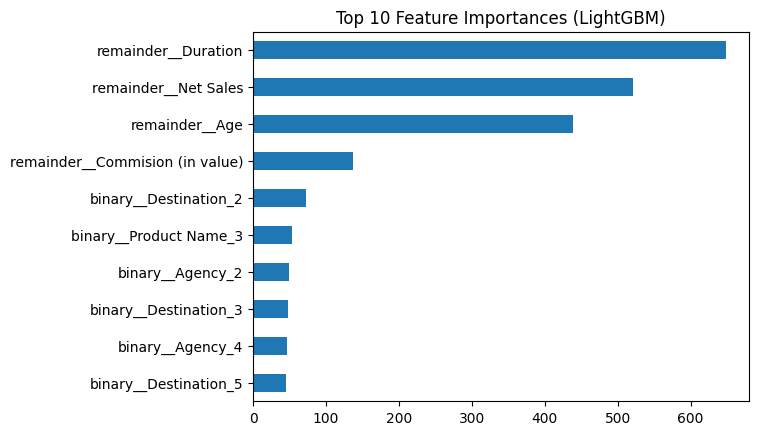

In [254]:
# Ambil nama fitur hasil preprocessing
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()

# Ambil feature importance dari LGBM
importances = best_model.named_steps['model'].feature_importances_

# Gabungkan & ambil top 10
coef1 = (
    pd.Series(importances, index=feature_names)
    .sort_values(ascending=False)
    .head(10)
)

# Plot
coef1.plot(kind='barh', title='Top 10 Feature Importances (LightGBM)')
plt.gca().invert_yaxis()
plt.show()

Terlihat bahwa pada model LightGBM, fitur Duration menjadi fitur yang paling berpengaruh, diikuti oleh `Net Sales`, `Age`, serta fitur kategori seperti `Destination` dan `Product Name`.

Hal ini menunjukkan bahwa lama perjalanan, nilai premi, dan karakteristik pelanggan memiliki peran penting dalam memprediksi kemungkinan terjadinya klaim asuransi perjalanan.

Dengan memanfaatkan model ini, perusahaan asuransi dapat mengidentifikasi polis berisiko tinggi lebih dini, sehingga strategi penetapan premi, manajemen risiko, dan pencegahan klaim dapat dilakukan secara lebih efektif. Pada akhirnya, penerapan model ini diharapkan mampu menekan kerugian klaim serta meningkatkan profitabilitas dan efisiensi operasional perusahaan asuransi perjalanan.

## Conclusion & Recommendation

In [255]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      8731
           1       0.06      0.65      0.10       135

    accuracy                           0.83      8866
   macro avg       0.53      0.74      0.50      8866
weighted avg       0.98      0.83      0.89      8866



Model LightGBM yang telah dituning menunjukkan kemampuan yang baik dalam mendeteksi klaim asuransi (class 1) dengan nilai recall sebesar 65%, yang berarti model berhasil mengidentifikasi sebagian besar kasus klaim yang benar-benar terjadi. Hal ini sejalan dengan tujuan bisnis untuk meminimalkan risiko kehilangan klaim aktual (False Negative) yang dapat berdampak pada kerugian finansial perusahaan.

Namun, precision pada class klaim masih rendah (6%), yang mengindikasikan bahwa cukup banyak prediksi klaim yang ternyata tidak benar (False Positive). Konsekuensinya, perusahaan mungkin akan melakukan investigasi atau penanganan klaim tambahan yang sebenarnya tidak diperlukan.

Secara keseluruhan, model ini lebih berorientasi pada recall dibanding precision, sehingga lebih cocok digunakan sebagai sistem early warning atau screening awal klaim. Pendekatan ini dapat membantu perusahaan asuransi dalam mengelola risiko secara proaktif, dengan trade-off berupa peningkatan biaya operasional akibat false alarm, namun tetap menghindari kerugian besar akibat klaim yang tidak terdeteksi.

#### Recommendation

1. Rekomendasi untuk Bisnis

Model dapat digunakan sebagai early warning system untuk memprediksi kemungkinan klaim sejak polis diterbitkan. Perusahaan dapat:
- Menyesuaikan strategi mitigasi risiko
- Menentukan alokasi dana cadangan klaim
- Mendukung penentuan premi yang lebih tepat
- Model sangat bermanfaat untuk prioritisasi polis berisiko tinggi, bukan sebagai pengganti keputusan bisnis sepenuhnya.

2. Rekomendasi untuk Model

Model sebaiknya:
- Diretrain secara berkala (misalnya setiap 6–12 bulan) agar tetap relevan dengan pola klaim terbaru.
- Dipantau performanya, terutama recall dan F2-score, untuk memastikan tidak terjadi penurunan kemampuan deteksi klaim.

3. Rekomendasi untuk Data

Mengumpulkan fitur tambahan yang berpotensi meningkatkan performa model, seperti:
- Riwayat klaim pelanggan
- Jenis perjalanan (bisnis/liburan)
- Tujuan negara berdasarkan tingkat risiko
- Informasi kesehatan atau usia yang lebih tersegmentasi
- Mengurangi missing value (misalnya pada fitur Gender) agar fitur tersebut dapat dimanfaatkan dalam modeling.